#Case study of the correlation of assets in the portfolio

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [7]:
#Assets to be analyzed

FII = ['BRCO11.SA', 'BRCR11.SA', 'BTAL11.SA', 'BTLG11.SA', 'CPTS11.SA', 'DEVA11.SA', 'KNSC11.SA', 'RBRR11.SA', 'VISC11.SA', 'XPML11.SA']
AST = ['ALOS3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BRSR6.SA', 'ISAE4.SA', 'TRPL4.SA', 'JSLG3.SA', 'MILS3.SA', 'MLAS3.SA', 'POSI3.SA', 'SIMH3.SA',
        'TASA4.SA', 'TUPY3.SA', 'VLID3.SA', 'VULC3.SA', 'WIZC3.SA']
IND = ['USDBRL=X', '^BVSP', '^GSPC', 'EURBRL=X', 'XFIX11.SA']

In [8]:
FII2 = yf.download(FII, start = '2022-01-01')['Adj Close']
AST2 = yf.download(AST, start = '2022-01-01')['Adj Close']
IND2 = yf.download(IND, start = '2022-01-01')['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  16 of 16 completed
[*********************100%***********************]  5 of 5 completed


In [9]:
IND2.rename(columns = {'^BVSP': 'IBOV', 'USDBRL=X':'USD/BRL', '^GSPC':'S&P 500', 'EURBRL=X':'EUR/BRL', 'XFIX11.SA':'IFIX'}, inplace = True)


Merging all data

In [10]:
dfs = [FII2, AST2, IND2]
df_final = reduce(lambda left,right: pd.merge(left,right, how = "inner", on='Date'), dfs)

In [11]:
retornos = df_final.pct_change()
retornos = retornos.dropna()

<ipython-input-11-41f180007d5c>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = df_final.pct_change()


In [12]:
retornos.head()

Ticker,BRCO11.SA,BRCR11.SA,BTAL11.SA,BTLG11.SA,CPTS11.SA,DEVA11.SA,KNSC11.SA,RBRR11.SA,VISC11.SA,XPML11.SA,...,TRPL4.SA,TUPY3.SA,VLID3.SA,VULC3.SA,WIZC3.SA,EUR/BRL,USD/BRL,IFIX,IBOV,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-12,0.000097,-0.011091,-0.000852,-0.001646,-0.002778,-0.023967,-0.009357,-0.019252,-0.005767,-0.007325,...,-0.017530,0.014256,-0.051883,0.004972,-0.013675,0.002880,0.003312,-0.008000,-0.001376,-0.002893
2024-11-13,0.008115,-0.007009,-0.001279,-0.006390,-0.016578,-0.021002,-0.004723,-0.005030,-0.000600,0.002719,...,0.002075,-0.003721,0.015403,-0.006803,0.000000,-0.005488,-0.001251,0.000896,0.000282,0.000232
2024-11-14,-0.005942,-0.002588,0.006406,0.009336,0.020000,-0.001650,0.001186,0.006289,-0.000600,0.007069,...,0.002070,-0.074274,-0.021557,0.002491,0.003466,0.004902,0.010038,-0.000895,0.000454,-0.006050
2024-11-18,-0.002217,0.015570,-0.002546,-0.000932,-0.008403,0.008264,-0.005924,0.016420,0.015218,0.002037,...,-0.005372,-0.019274,0.015912,0.004348,0.017271,-0.003631,-0.001946,0.002688,-0.000188,-0.009337
2024-11-19,0.002802,-0.000465,0.011061,0.006948,0.000000,-0.001639,0.003576,-0.005787,0.000000,0.002517,...,-0.002077,0.000914,-0.020080,-0.014023,0.003396,-0.003681,-0.008318,0.003575,0.003358,0.003964


Correlation matrix:

In [13]:
retornos.corr()

Ticker,BRCO11.SA,BRCR11.SA,BTAL11.SA,BTLG11.SA,CPTS11.SA,DEVA11.SA,KNSC11.SA,RBRR11.SA,VISC11.SA,XPML11.SA,...,TRPL4.SA,TUPY3.SA,VLID3.SA,VULC3.SA,WIZC3.SA,EUR/BRL,USD/BRL,IFIX,IBOV,S&P 500
Ticker,,,,,,,,,,,,,,,,,,,,,
BRCO11.SA,1.000000,0.574836,0.080984,0.349080,0.140401,0.248028,0.144632,0.089021,0.364605,0.340637,...,-0.034577,-0.026967,-0.328945,0.045052,0.265407,-0.164104,-0.103149,0.351433,-0.041825,-0.032251
BRCR11.SA,0.574836,1.000000,0.461836,0.244373,0.119278,0.485088,0.452663,0.282037,0.326262,0.336502,...,0.247541,0.023721,-0.148472,0.277384,0.422679,-0.278080,-0.159704,0.523750,0.300823,0.170600
BTAL11.SA,0.080984,0.461836,1.000000,0.525923,0.246515,0.190009,0.194641,0.584610,0.471422,0.630723,...,0.129587,-0.029198,0.129656,0.059726,0.071111,-0.298004,-0.174314,0.658346,0.042613,0.501979
BTLG11.SA,0.349080,0.244373,0.525923,1.000000,0.404250,0.138029,0.037641,0.342190,0.620961,0.800491,...,-0.213201,-0.129887,-0.156899,0.052806,-0.175156,-0.186335,-0.050817,0.730953,-0.234514,0.096385
CPTS11.SA,0.140401,0.119278,0.246515,0.404250,1.000000,-0.027232,0.245226,0.205814,0.455231,0.441417,...,-0.052325,0.018173,0.182669,0.300752,0.088385,-0.124246,-0.308889,0.476418,0.027730,0.047645
DEVA11.SA,0.248028,0.485088,0.190009,0.138029,-0.027232,1.000000,0.225474,0.349700,0.349263,0.186512,...,-0.049705,-0.011384,-0.062155,-0.069892,0.116894,0.024403,0.224538,0.451072,0.049461,0.057307
KNSC11.SA,0.144632,0.452663,0.194641,0.037641,0.245226,0.225474,1.000000,0.155222,0.129458,0.175421,...,0.162963,-0.103999,-0.064129,0.315459,0.306843,0.094031,-0.083228,0.302732,0.310400,-0.021814
RBRR11.SA,0.089021,0.282037,0.584610,0.342190,0.205814,0.349700,0.155222,1.000000,0.484899,0.539298,...,0.081418,-0.058112,0.174802,-0.115537,0.123108,-0.260536,0.170634,0.587416,-0.041985,0.414365
VISC11.SA,0.364605,0.326262,0.471422,0.620961,0.455231,0.349263,0.129458,0.484899,1.000000,0.840601,...,-0.067511,0.004553,-0.098032,0.133013,-0.034379,-0.152323,-0.066757,0.698767,-0.140208,0.228711


<Axes: xlabel='Ticker', ylabel='Ticker'>

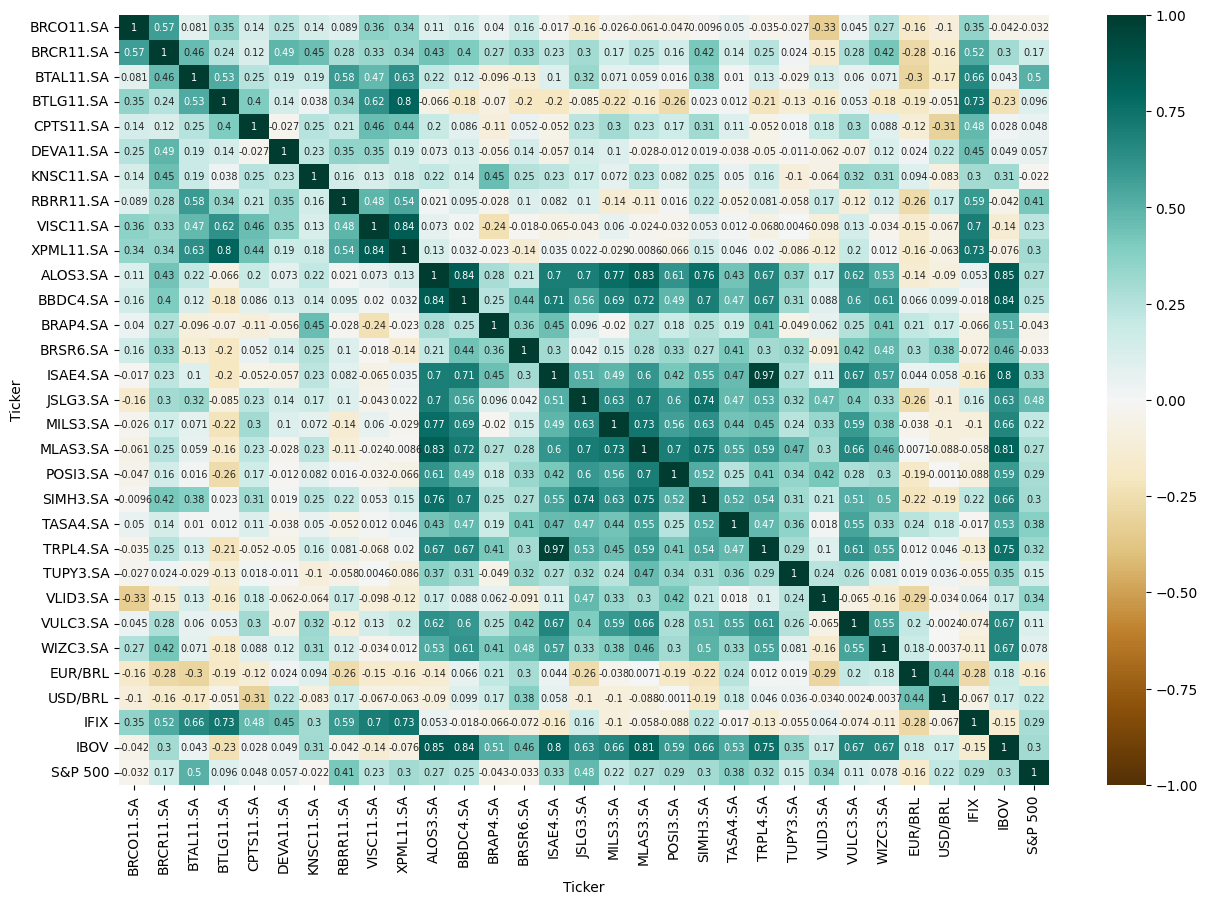

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(retornos.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', annot_kws={'size': 7})
